In [1]:
# ==============================================================
# 📘 Machine_Learning_Polynomial_Regression --> Python Basic To Advanced
# Author: Muhammad Shah Asyraf
# Credit: Yash Sharma
# Artificial Intelligence & Machine Learning Course
# ==============================================================

In [2]:
# SUPERVISED MACHINE LEARNING
# REGRESSION - Polynomial Regression


# Import All Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.linear_model as lm
lin_reg = lm.LinearRegression()

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
data

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [4]:
# Select Dependent and Independent Variable
X = data.Level.values.reshape(-1,1)
Y = data.Salary.values

In [5]:
# Model Development
lin_reg.fit(X,Y)

LinearRegression()

In [6]:
data['predicted_salaries'] = lin_reg.predict(X)

In [7]:
data[['Level','Salary','predicted_salaries']]

,Level,Salary,predicted_salaries
0,1,45000,-114454.545455
1,2,50000,-33575.757576
2,3,60000,47303.030303
3,4,80000,128181.818182
4,5,110000,209060.606061
5,6,150000,289939.393939
6,7,200000,370818.181818
7,8,300000,451696.969697
8,9,500000,532575.757576
9,10,1000000,613454.545455


In [8]:
pred_values = lin_reg.predict(X)
pred_values

array([-114454.54545455,  -33575.75757576,   47303.03030303,
        128181.81818182,  209060.60606061,  289939.39393939,
        370818.18181818,  451696.96969697,  532575.75757576,
        613454.54545455])

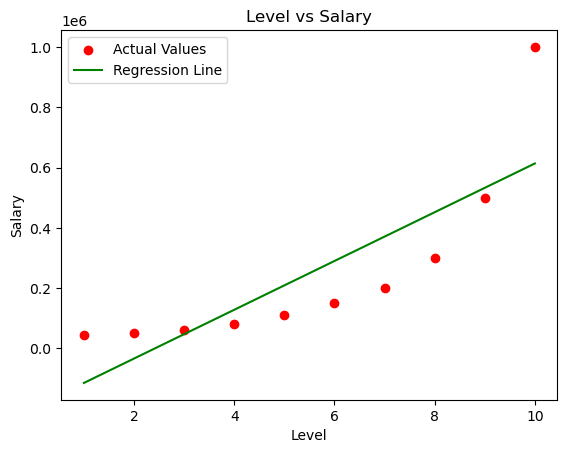

In [9]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,pred_values,color='green',label='Regression Line')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [10]:
# We Will Try To Use Normalization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
y_scaled = scaler.fit_transform(Y.reshape(-1,1)).flatten()
y_scaled

array([-0.72004253, -0.70243757, -0.66722767, -0.59680786, -0.49117815,
       -0.35033854, -0.17428902,  0.17781001,  0.88200808,  2.64250325])

In [11]:
# Model Development
lin_reg.fit(X,y_scaled)

LinearRegression()

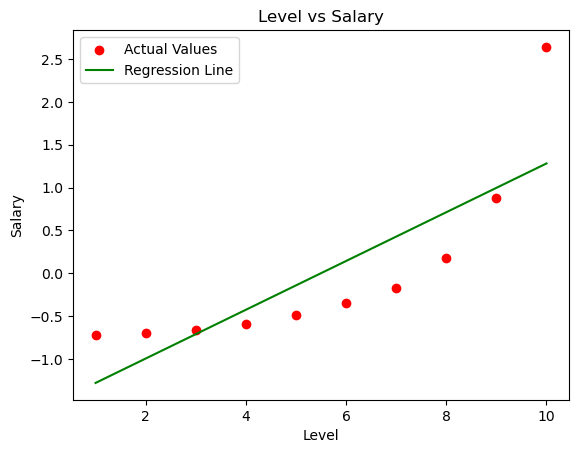

In [12]:
# plot actual values
plt.scatter(X,y_scaled,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,lin_reg.predict(X),color='green',label='Regression Line')
plt.title('Level vs Salary')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [13]:
# Let's Use Polynomial Regression
# Generate Polynomial Features

# by default the degree of independent variable is 1
# but in Polynomial regression we will increase the degree of independent variable
# and then we will Train Our Model

from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=2)

x_poly_2 = poly_reg.fit_transform(X)
x_poly_2


# when degree = 2 , then new features will be created like this  1  x*1   x*x
# when degree = 3 , then new features will be created like this  1  x*1   x*x  x*x*x
# when degree = 4 , then new features will be created like this  1  x*1   x*x  x*x*x  x*x*x*x

array([[  1.,   1.,   1.],
       [  1.,   2.,   4.],
       [  1.,   3.,   9.],
       [  1.,   4.,  16.],
       [  1.,   5.,  25.],
       [  1.,   6.,  36.],
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   9.,  81.],
       [  1.,  10., 100.]])

In [14]:
# train our model using Degree = 2
lin_reg.fit(x_poly_2,Y)

LinearRegression()

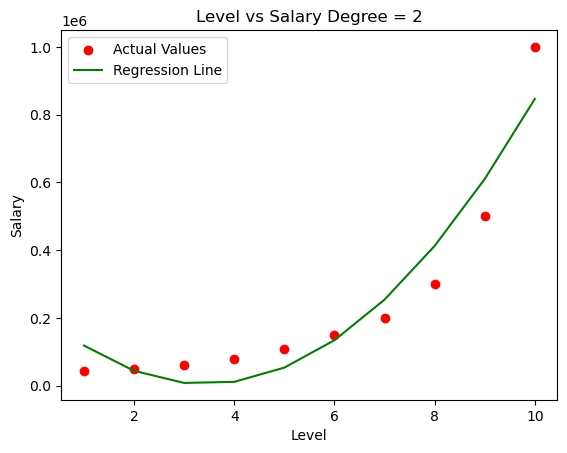

In [15]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,lin_reg.predict(x_poly_2),color='green',label='Regression Line')
plt.title('Level vs Salary Degree = 2')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [16]:
poly_reg = PolynomialFeatures(degree=3)

x_poly_3 = poly_reg.fit_transform(X)
x_poly_3

array([[   1.,    1.,    1.,    1.],
       [   1.,    2.,    4.,    8.],
       [   1.,    3.,    9.,   27.],
       [   1.,    4.,   16.,   64.],
       [   1.,    5.,   25.,  125.],
       [   1.,    6.,   36.,  216.],
       [   1.,    7.,   49.,  343.],
       [   1.,    8.,   64.,  512.],
       [   1.,    9.,   81.,  729.],
       [   1.,   10.,  100., 1000.]])

In [17]:
# train our model using Degree = 3
lin_reg.fit(x_poly_3,Y)

LinearRegression()

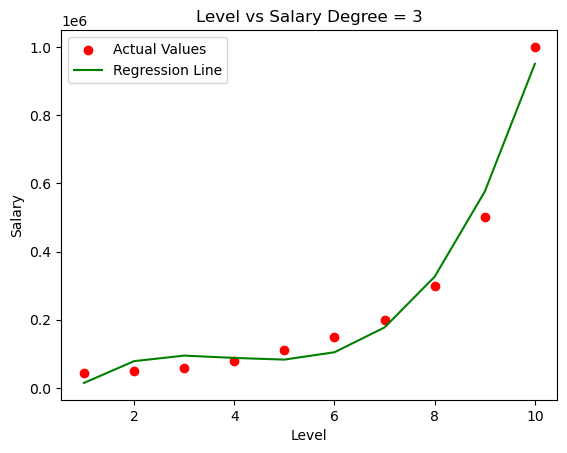

In [18]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,lin_reg.predict(x_poly_3),color='green',label='Regression Line')
plt.title('Level vs Salary Degree = 3')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [19]:
poly_reg = PolynomialFeatures(degree=4)
x_poly_4 = poly_reg.fit_transform(X)
# train our model using Degree = 4
lin_reg.fit(x_poly_4,Y)

LinearRegression()

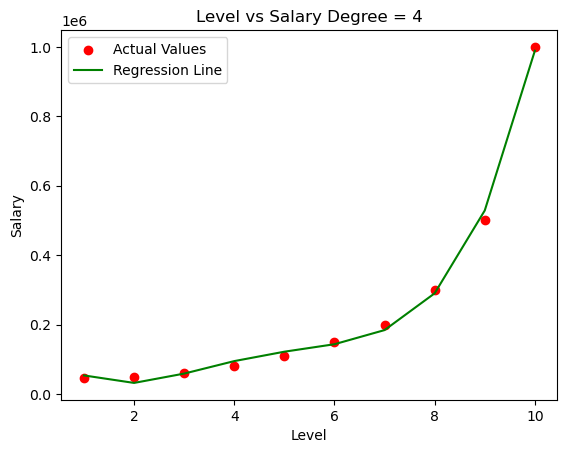

In [20]:
# plot actual values
plt.scatter(X,Y,color='red',label='Actual Values')
# plot predicted values
plt.plot(X,lin_reg.predict(x_poly_4),color='green',label='Regression Line')
plt.title('Level vs Salary Degree = 4')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.legend()
plt.show()

In [21]:
from sklearn.metrics import r2_score
accuracy = r2_score(Y,lin_reg.predict(x_poly_4))
print('Regression Score Function :',accuracy)
print(f'Regression Score Function : {int(accuracy*100)}%')

Regression Score Function : 0.9973922891706614
Regression Score Function : 99%


In [22]:
# Final Predictions
level = int(input('Enter Level : '))
level = poly_reg.fit_transform([[level]])
predict_sal = lin_reg.predict(level)
print("Predicted Salary : ",int(predict_sal[0]))

Enter Level :  6


Predicted Salary :  143275


Degree 1 - R2 Score: 0.6690412331929895
Degree 2 - R2 Score: 0.9162082221443942
Degree 3 - R2 Score: 0.9812097727913367
Degree 4 - R2 Score: 0.9973922891706614
Degree 5 - R2 Score: 0.9997969027099755


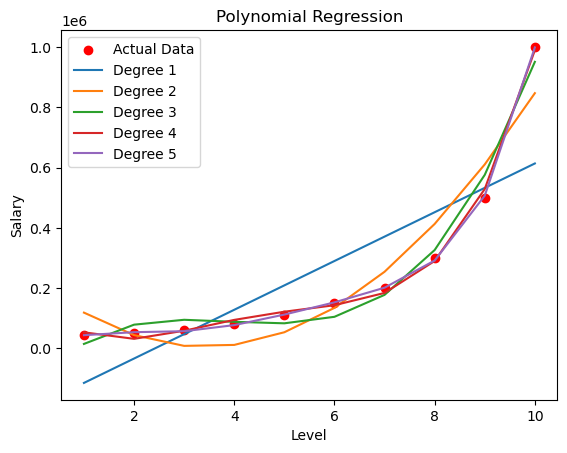

In [23]:
# Final Code For Polynomial Regression

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

# Try polynomial degrees 1 to 5 (no X_grid)
plt.scatter(X, y, color='red', label='Actual Data')

for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)

    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)

    # Predict using the same X (no grid)
    y_pred = lin_reg.predict(X_poly)

    # Calculate r2 score
    r2 = r2_score(y, y_pred)
    print(f"Degree {degree} - R2 Score: {r2}")

    # Plot the curve
    plt.plot(X, y_pred, label=f'Degree {degree}')

plt.title("Polynomial Regression")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()
plt.show()

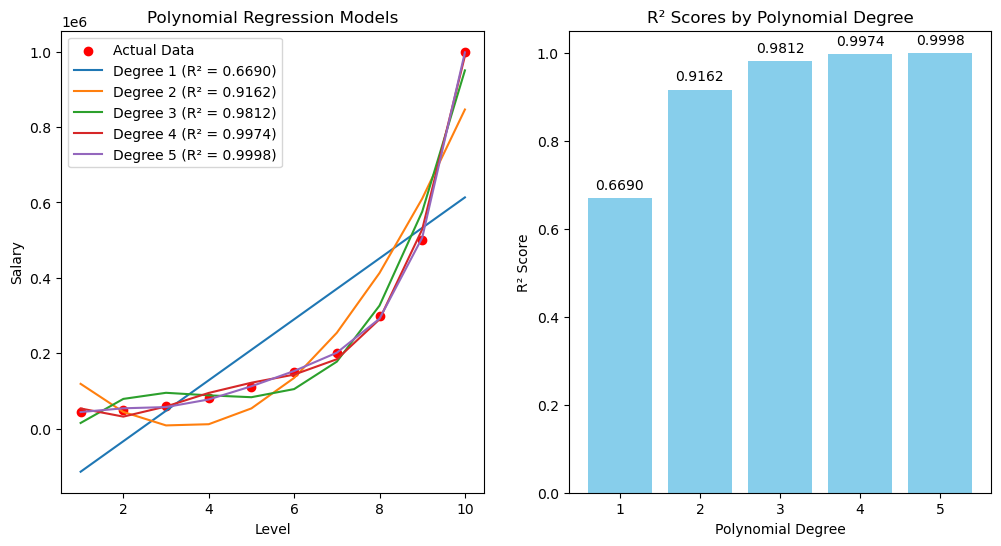

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Load the dataset
data = pd.read_csv('https://raw.githubusercontent.com/yash240990/Python/master/Position_Salaries.csv')
X = data[['Level']].values
y = data['Salary'].values

# Create figure for plotting
plt.figure(figsize=(12, 6))

# Plot the actual data points
plt.subplot(1, 2, 1)
plt.scatter(X, y, color='red', label='Actual Data')

# Dictionary to store R² scores
r2_scores = {}

# Try polynomial degrees 1 to 5
for degree in range(1, 6):
    # Create polynomial features
    poly = PolynomialFeatures(degree=degree)
    X_poly = poly.fit_transform(X)
    # Fit linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(X_poly, y)
    # Predict using the same X
    y_pred = lin_reg.predict(X_poly)
    # Calculate R² score
    r2 = r2_score(y, y_pred)
    r2_scores[degree] = r2
    # Plot the curve
    plt.plot(X, y_pred, label=f'Degree {degree} (R² = {r2:.4f})')

plt.title("Polynomial Regression Models")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.legend()

# Plot the R² scores
plt.subplot(1, 2, 2)
degrees = list(r2_scores.keys())
scores = list(r2_scores.values())
plt.bar(degrees, scores, color='skyblue')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.title('R² Scores by Polynomial Degree')
for i, v in enumerate(scores):
    plt.text(i+1, v+0.02, f'{v:.4f}', ha='center')

plt.show()